In [151]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt

### Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [152]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

визуализирую признак для лучшего понимания данных:

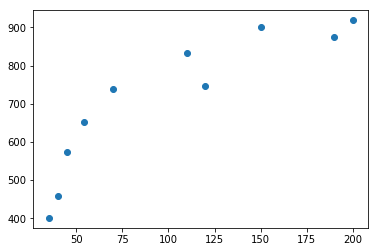

In [153]:
plt.scatter(zp, ks);

##### вариант расчета через формулы (с интерспетом и без)

считаю коэффициенты регрессии ks = a + b*zp через формулы:

In [154]:
b = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [155]:
a = 0

In [156]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

следовательно, прогнозные значение скоринга для заданного вектора з /п составит:

In [157]:
ks_pred = a + b * zp
ks_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

визуализирую найденные коэффициенты через прямую линейной регрессии: 

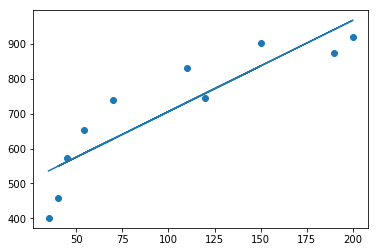

In [158]:
plt.scatter(zp, ks);
plt.plot(zp, ks_pred);

считаю среднеквадратическую ошибку:

In [159]:
def mse(y, y_pred):
    err = np.sum((y - y_pred)**2) / len(y)
    return err
mse(ks, ks_pred)

6470.414201176658

для варианта без интерспета приравняю коэф a к 0:

In [160]:
ks_pred = 0 + b * zp
ks_pred

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

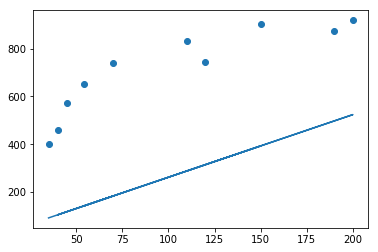

In [161]:
plt.scatter(zp, ks);
plt.plot(zp, ks_pred);

результат значительно хуже, проверю ошибку:

In [162]:
mse(ks, ks_pred)

203763.93896082853

##### вариант расчета через СЛАУ вида  $W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$ (с интерспетом)

определяю переменную при первом коэф как единицу и завожу ее в систему с второй переменной

In [163]:
X = np.vstack((np.ones((1, 10)), zp))

In [164]:
W = np.dot(np.dot(np.linalg.inv(np.dot(X, X.T)), X), ks.T)
W

array([444.17735732,   2.62053888])

результат аналогичен расчету через формулу коэффициентов

думал, как получить без интерсепта - обнул переменную при интерсепте, не находится обратная матрица, подскажите, пжл, что надо сделать?

### Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

найдем производныую функции $f = \frac{\sum{w_1*X - y}^2}{n}$ 

по $w_1$ : 

$f = \frac{1}{n} \sum{2*(w_1*X - y) * X}  =  \frac{2}{n} \sum{(w_1*X - y) * X}  $ 

зададим скорость градиентного спуска:

In [165]:
alpha = 1e-7

зададим произвольное значение веса, от которого начнем спуск:

In [166]:
w1 = 0.01

зададим ограничение на кол-во шагов градиентного спуска:

In [167]:
itrs = 10000

пропишем функцию и запустим градиентный спуск, в саму функцию запишу и расчет ошибки:

In [168]:
def grad_dscn(alpha, w1, itrs, X, y):
    for i in range(itrs):
        y_pred = w1 * X
        w1 -= alpha * (2/len(X)) * np.sum((y_pred - y) * X)
        mse_ = np.sum((w1 * X - y)**2)/len(X)
        if i%1000 ==0:
            print('iteration: {i}, w1: {w1}, mse: {mse}'.format(i=i, w1=w1, mse=mse_))
    

In [169]:
grad_dscn(alpha, w1, itrs, X[1], ks)

iteration: 0, w1: 0.0262007868, mse: 530184.4046127194
iteration: 1000, w1: 5.518375906423665, mse: 58417.630063043674
iteration: 2000, w1: 5.866290410447163, mse: 56524.48598675374
iteration: 3000, w1: 5.888329857382757, mse: 56516.88902425671
iteration: 4000, w1: 5.889725996996393, mse: 56516.85853854784
iteration: 5000, w1: 5.889814438681274, mse: 56516.8584162123
iteration: 6000, w1: 5.889820041223851, mse: 56516.85841572138
iteration: 7000, w1: 5.889820396129836, mse: 56516.85841571943
iteration: 8000, w1: 5.889820418612173, mse: 56516.85841571941
iteration: 9000, w1: 5.88982042003637, mse: 56516.85841571943


In [170]:
w1 =  5.889796417355146
ks_pred = w1 * zp

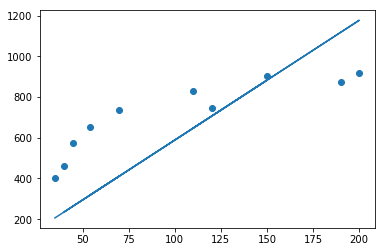

In [171]:
plt.scatter(zp, ks);
plt.plot(zp, ks_pred);

транспонирую матрицы

In [172]:
def mse(y, y_pred):
    err = np.sum((y - y_pred)**2) / len(y)
    return err

### Задание 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Лапласса - если известно стандартное отклонение, если неизвестно - Стьюдента

### Задание 4
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

дополню функцию расчета свободного коэф, я так понял, все сводится просто к тому, чтобы провести расчет и того и другого в пределах одной итерации:

In [173]:
def grad_dscn_full(alpha, w0, w1, itrs, X, y):
    for i in range(itrs):
        y_pred = w0 + w1 * X
        w1 -= alpha * (2/len(X)) * np.sum((y_pred - y) * X)
        w0 -= alpha * np.sum(y_pred-y)
        mse_ = np.sum(((w0 + w1 * X) - y)**2)/len(X)
        if i%10000 ==0:
            print('iteration: {i}, w0: {w0}, w1: {w1}, mse: {mse}'.format(i=i, w0=w0, w1=w1, mse=mse_))

параметры я немного поднял, ибо долго считалось

In [174]:
w0=0.1
w1=10
alpha=1e-5
itrs = 300000

In [175]:
grad_dscn_full(alpha, w0, w1, itrs, X[1], ks)

iteration: 0, w0: 0.06958, w1: 8.8673112, mse: 178678.97562922697
iteration: 10000, w0: 99.46355183492541, w1: 5.157971724570893, mse: 36612.80937175952
iteration: 20000, w0: 176.67855317395345, w1: 4.589593327229011, mse: 24621.562085232283
iteration: 30000, w0: 236.59759381503054, w1: 4.148530221624625, mse: 17400.6726509231
iteration: 40000, w0: 283.0949242441705, w1: 3.806264111520546, mse: 13052.397365073193
iteration: 50000, w0: 319.17697285351335, w1: 3.540664725316503, mse: 10433.952901473534
iteration: 60000, w0: 347.176735847022, w1: 3.3345589150436097, mse: 8857.177983090103
iteration: 70000, w0: 368.9046243098142, w1: 3.1746202734850697, mse: 7907.675643893703
iteration: 80000, w0: 385.76552192387624, w1: 3.0505074741917246, mse: 7335.9043139287705
iteration: 90000, w0: 398.8496220580717, w1: 2.954195621106567, mse: 6991.5950476172675
iteration: 100000, w0: 409.0029175848134, w1: 2.8794573741448195, mse: 6784.258889514915
iteration: 110000, w0: 416.8819011599924, w1: 2.8214

In [176]:
a

444.1773573243596

In [177]:
b

2.620538882402765

ну и аналогично расчету по коэффициентов по формуле.